<a href="https://colab.research.google.com/github/MendesEric/TransferLearningKeras/blob/main/CIFAR10Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras as k
from keras import datasets
from keras.datasets import cifar10
from keras import applications
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, LSTM, \
    Flatten, TimeDistributed, Conv2D, Dropout
from keras import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import preprocess_input





In [ ]:
#importando o dataset direto do keras
(x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()
#one hot encoding para as 10 classes do cifar10
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
#pré processamento necessário para resnet50
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

In [ ]:
#Como a resnet50 foi treinada com tamanho diferente de imagens (224x224), é necessário realizar um "upscale".
inputs = k.Input(shape=(32, 32, 3))
upscale = k.layers.Lambda(lambda x: tf.image.resize_with_pad(x,
                                                    160,
                                                    160,
                                                    method=tf.image.ResizeMethod.BILINEAR))(inputs)


In [ ]:
resnet = ResNet50(include_top=False,
                   input_shape=(160,160,3),
                   input_tensor=upscale,
                   pooling='max',
                   weights='imagenet')
# for layer in resnet.layers:
#  layer.trainable=False
out = resnet.output
out = k.layers.Flatten()(out)
out = k.layers.BatchNormalization()(out)
out = k.layers.Dense(256, activation='relu')(out)
out = k.layers.Dropout(0.3)(out)
out = k.layers.BatchNormalization()(out)
out = k.layers.Dense(128, activation='relu')(out)
out = k.layers.Dropout(0.3)(out)
out = k.layers.BatchNormalization()(out)
out = k.layers.Dense(64, activation='relu')(out)
out = k.layers.Dropout(0.3)(out)
out = k.layers.Dense(10, activation='softmax')(out)

In [ ]:
model = k.models.Model(inputs=inputs, outputs=out)
model.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 335s 211ms/step - loss: 1.2071 - accuracy: 0.5936 - val_loss: 1.0301 - val_accuracy: 0.6571
Epoch 2/10
1563/1563 [==============================] - 328s 210ms/step - loss: 0.7595 - accuracy: 0.7576 - val_loss: 0.7013 - val_accuracy: 0.7632
Epoch 3/10
1563/1563 [==============================] - 331s 212ms/step - loss: 0.6091 - accuracy: 0.8081 - val_loss: 0.5861 - val_accuracy: 0.8065
Epoch 4/10
1563/1563 [==============================] - 327s 209ms/step - loss: 0.5166 - accuracy: 0.8361 - val_loss: 0.5555 - val_accuracy: 0.8164
Epoch 5/10
1563/1563 [==============================] - 327s 209ms/step - loss: 0.4489 - accuracy: 0.8578 - val_loss: 0.4695 - val_accuracy: 0.8466
Epoch 6/10
1563/1563 [==============================] - 326s 209ms/step - loss: 0.3715 - accuracy: 0.8818 - val_loss: 0.4378 - val_accuracy: 0.8529
Epoch 7/10
1563/1563 [==============================] - 325s 208ms/step - loss: 0.3179 - accuracy: 0.8987 - val_

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 16s 52ms/step - loss: 0.3867 - accuracy: 0.8806


[0.3866686224937439, 0.8805999755859375]

In [ ]:
import matplotlib.pyplot as plt

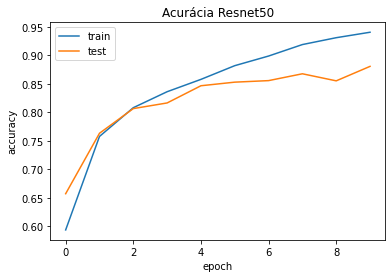

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia Resnet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

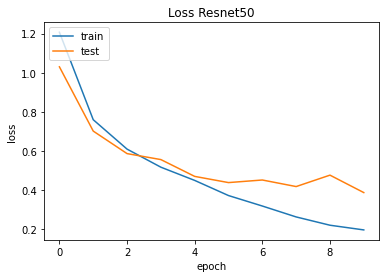

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Resnet50')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()